In [1]:
# We import our packages
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the final dataframe of Milestone 2
df = pd.read_pickle('Pickles/Final_dataframe.pickle')
df.head()

,State,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,Theft,Motor_Vehicle_theft,Per_capita_income,Life_Expectancy,N_of_colleges_universities,N_of_junior_colleges,N_of_technical_trade_schools,awards_per_value,exp_award_value,top_230_ranking_score
0,alabama,605.416667,659.000000,800.666667,1069.666667,1244.333333,3434,3793,4111,3970,...,2006.3,241.1,38215.0,74.813987,42.0,36.0,16.0,19.514493,63013.173913,366
1,alaska,814.333333,930.500000,1190.333333,1682.166667,2019.500000,2016,1845,1940,1956,...,2394.7,412.1,54430.0,78.915541,6.0,1.0,2.0,18.414286,141431.142857,29
2,arizona,701.000000,828.000000,1046.000000,1512.333333,1754.416667,9865,8947,9707,9896,...,2168.1,265.8,39955.0,78.364742,46.0,43.0,42.0,25.563492,47830.888889,209
3,arkansas,524.666667,571.166667,721.416667,977.583333,1144.833333,2712,2467,2463,2560,...,2233.6,239.4,39171.0,75.626900,26.0,26.0,32.0,21.970833,51132.479167,96
4,california,1212.333333,1426.333333,1818.916667,2519.250000,2926.333333,129972,131532,118142,115738,...,1623.0,450.3,54800.0,80.231014,264.0,191.0,239.0,22.771429,63022.202857,3064


# How ADA can help you to choose where to live
## A data analysis based on *quality of life* in the USA

In our lives, we must do some choices.
Probably, one of the most difficult ones is the place we want to live in. Of course the right environment is necessary to live the *life of our dreams*.
The *quality* of a place is something absolutely subjective and depends on personal factors, like "places of the heart", closeness to family and friends, possibility to do activities each person likes...

At the same time, we can underline some features that are **general and objective** when describing the *quality* of places: rate of education, health, security, income...
Basing on these features, sociologists tried to perform some indicative analysis to decide if some places are objectively better than others, and to select these places.

The **Human Development Index (HDI)** is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development. A country scores a higher HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher. [1]

Basing on this universally recognised index, we want to personalize our analysis.
The classic HDI gives fixed weights to each feature. But every person has its own preferencies and necessities. Some people could consider the possinility of obtaining an high income as a must, while others would barter it with a longer and healthy life, or with security.
That is why we tried to find data for single categories: many sites offer dataset about different topics and different geographic areas.
We decided to focus on **USA** for different reasons: there are tons of data about whatever about USA, from both governative sites, research sites, universities and other sources; US are a country where it is possible to find huge differences between states about lifestyle, health, security, GDP; finally, USA are seen as a classical country where to live, so our analysis could be socially useful!

In our analysis we selected data from different sources (governative datasets, websites...) and in different formats (csv, xml, html...) in order to obtain different features for different **USA states**.
We obtained more than 40 different features, related to different macrocategories:
- **Education**;
- **Health**;
- **Security**;
- **Economy**.

For each macrocategory, we analised all data related to all categories, in order to evaluate all states giving them a *score* for each field.
These scores are used to evaluate which state in the USA is the **best place to live**.

In [3]:
education_list = ['State', 'Population', 'N_of_colleges_universities', 'N_of_junior_colleges', 
                  'N_of_technical_trade_schools', 'awards_per_value', 'exp_award_value', 'top_230_ranking_score',
                  'High_School_Fee', 'Elementary_School_Fee']
health_list = ['State', 'Population', 'Life_Expectancy', 'mc_donalds_per_100k', 'adult_obesity_rate',
               'eating_vegetables_daily', 'Vegetable', 'diabetes_prevalence', 'alcohol_prevalence',
               'mean_physical_activity', 'mean_obesity']
security_list = ['State', 'Population', 'alcohol_prevalence', 'Overall Homeless, 2018', 'Violent_Crime',
                 'Murder_and_Manslaughter', 'Rape', 'Robbery', 'Aggravated_Assoult', 'Property_crime',
                 'Burglary', 'Theft', 'Motor_Vehicle_theft']
economy_list = ['State', 'Population', 'Per_capita_income', 'mc_donalds_per_100k', 'Price_2018_Studio',
                'Price_2018_1br',  'Price_2018_2br', 'Price_2018_3br', 'Price_2018_4br', 'Overall Homeless, 2018',
                'Elementary_School_Fee', 'High_School_Fee']
miscellaneous_list = ['State', 'Population']

## Education

In [53]:
# We create the "education" DataFrame basing on the final DataFrame of milestone 2
df_education = df[education_list]
df_education.head()

,State,Population,N_of_colleges_universities,N_of_junior_colleges,N_of_technical_trade_schools,awards_per_value,exp_award_value,top_230_ranking_score,High_School_Fee,Elementary_School_Fee
0,alabama,4863300,42.0,36.0,16.0,19.514493,63013.173913,366,7633,6388
1,alaska,741894,6.0,1.0,2.0,18.414286,141431.142857,29,6118,7544
2,arizona,6931071,46.0,43.0,42.0,25.563492,47830.888889,209,17339,6300
3,arkansas,2988248,26.0,26.0,32.0,21.970833,51132.479167,96,6580,4724
4,california,39250017,264.0,191.0,239.0,22.771429,63022.202857,3064,19235,11360


The **Education** score is calculated basing on the following features:
- *Number of colleges and universities* in each state in 2015;
- *Number of junior colleges* in each state in 2015;
- *Number of professional schools* (technical schools, trade schools...) in each state in 2015;
- *Number of graduations per 100 students* in 2015: the higher this parameter is, the higher the rate of success of students is and the better should be the education;
- *Institutional expenditure per graduation* in 2015: the higher this parameter is, the better the educational services offered are supposed to be;
- *Top-230-ranking score*: based on the Top 230 university ranking of 2015, this score takes into account both the number of university per state present in the ranking and their position in the ranking itself;
- *Average High School and Elementary School fees* in dollars per year: these parameters can be considered in both positive and negative way, as a higher fee could mean a better quality of education, but at the same time a higher expenditure of privates for it. We decide to privilege the quality-price ratio; in this prospective, as we have many qualitative features, these two categories will be used to underline the price of education and therefore will have a negative value.

We can immediately notice that our features are divided in some intensive quantities (independent on the value of population for each state) and some extensive ones.
For example, we can immediately understand that in a big state like California there will be more universities and colleges than in Alaska, but the fee for schools, that is calculated per-capita, should not be affected by the population!
To verify this, we plot the two features in function of the population.

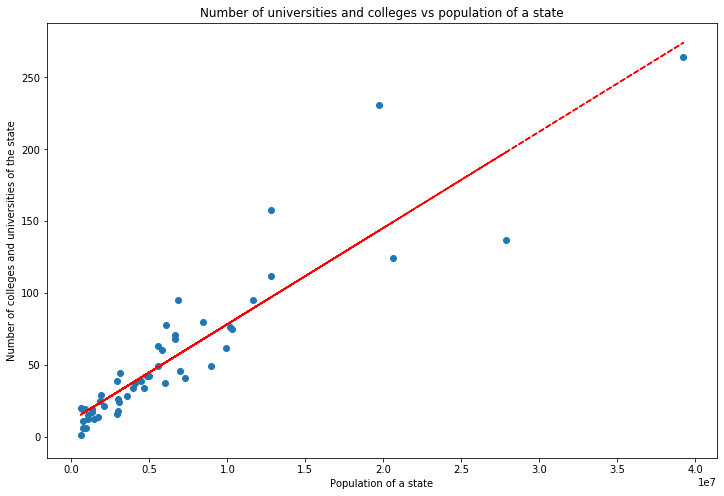

In [54]:
# We plot the number of universities and colleges over the population
plt.figure(figsize=(12,8))
plt.title("Number of universities and colleges vs population of a state")
plt.xlabel("Population of a state")
plt.ylabel("Number of colleges and universities of the state")
z = np.polyfit(df_education.Population, df_education.N_of_colleges_universities, 1)
p = np.poly1d(z)
plt.plot(df_education.Population,p(df_education.Population),"r--")
plt.scatter(df_education.Population, df_education.N_of_colleges_universities) 

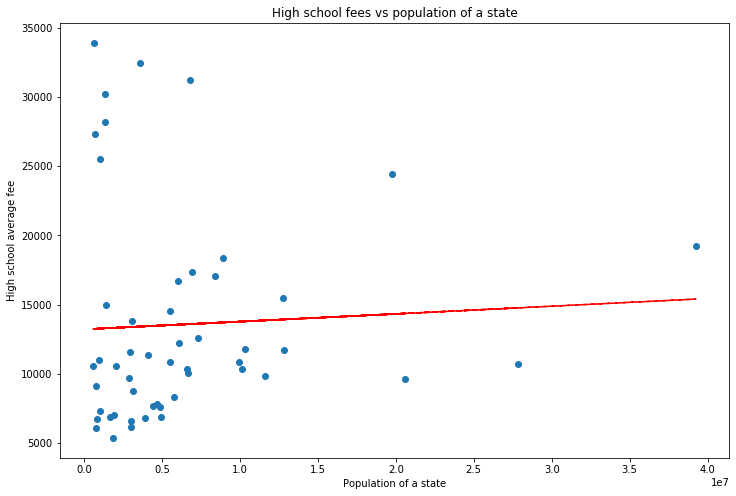

In [55]:
# We do the same for the High school fees
plt.figure(figsize=(12,8))
plt.title("High school fees vs population of a state")
plt.xlabel("Population of a state")
plt.ylabel("High school average fee")
z = np.polyfit(df_education.Population, df_education.High_School_Fee, 1)
p = np.poly1d(z)
plt.plot(df_education.Population,p(df_education.Population),"r--")
plt.scatter(df_education.Population, df_education.High_School_Fee) 

We can see that in the first case we can see a clear correlation between the two quantities, while in the second case there isn't.
We can consider as clearly extensive the first three features we have considered (Number of colleges and universities, Number of junior colleges, Number of professional schools).
But what about the top-230-ranking score?
Of course, it is influenced by the total number of universities: if there are more universities, it is more probable that many will be in the top 230. But the score is not barely related to the number of universities present in the ranking: will we find a meaningful correlation?
Let's plot this index in function of the population!

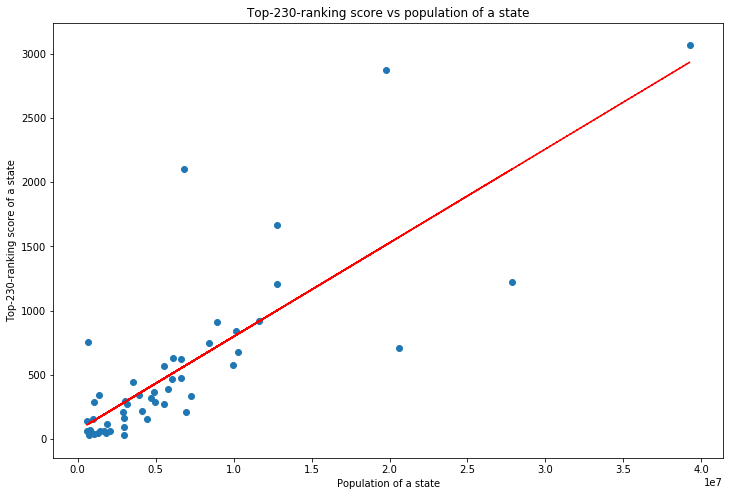

In [56]:
# We plot the top-230-ranking scorse vs the population
plt.figure(figsize=(12,8))
plt.title("Top-230-ranking score vs population of a state")
plt.xlabel("Population of a state")
plt.ylabel("Top-230-ranking score of a state")
z = np.polyfit(df_education.Population, df_education.top_230_ranking_score, 1)
p = np.poly1d(z)
plt.plot(df_education.Population,p(df_education.Population),"r--")
plt.scatter(df_education.Population, df_education.top_230_ranking_score) 

The relation seems to be meaningful! We can consider this quantity as extensive, and therefore we need to normalize it in function of the population!
Let's normalize our quantities!

In [60]:
# We calculate the normalized quantities we need
df_education_norm = df_education.copy()
df_education_norm['Colleges_universities_per_1000000'] = (df_education.N_of_colleges_universities)/(df_education.Population)*1000000
df_education_norm['Junior_colleges_per_1000000'] = (df_education.N_of_junior_colleges)/(df_education.Population)*1000000
df_education_norm['Prof_schools_per_1000000'] = (df_education.N_of_technical_trade_schools)/(df_education.Population)*1000000
df_education_norm['Intensive_top_230_score'] = (df_education.top_230_ranking_score)/(df_education.Population)*1000000
df_education_norm.head()

,State,Population,N_of_colleges_universities,N_of_junior_colleges,N_of_technical_trade_schools,awards_per_value,exp_award_value,top_230_ranking_score,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score
0,alabama,4863300,42.0,36.0,16.0,19.514493,63013.173913,366,7633,6388,8.636111,7.402381,3.289947,75.257541
1,alaska,741894,6.0,1.0,2.0,18.414286,141431.142857,29,6118,7544,8.087409,1.347901,2.695803,39.089142
2,arizona,6931071,46.0,43.0,42.0,25.563492,47830.888889,209,17339,6300,6.636781,6.203947,6.059670,30.154070
3,arkansas,2988248,26.0,26.0,32.0,21.970833,51132.479167,96,6580,4724,8.700750,8.700750,10.708616,32.125848
4,california,39250017,264.0,191.0,239.0,22.771429,63022.202857,3064,19235,11360,6.726112,4.866240,6.089169,78.063660


In [61]:
# Now we keep only the intensive quantities we need
df_education_final = df_education_norm[['State', 'awards_per_value', 'exp_award_value', 'High_School_Fee', 
                                        'Elementary_School_Fee', 'Colleges_universities_per_1000000', 
                                        'Junior_colleges_per_1000000', 
                                        'Prof_schools_per_1000000', 'Intensive_top_230_score']]
df_education_final.head()

,State,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score
0,alabama,19.514493,63013.173913,7633,6388,8.636111,7.402381,3.289947,75.257541
1,alaska,18.414286,141431.142857,6118,7544,8.087409,1.347901,2.695803,39.089142
2,arizona,25.563492,47830.888889,17339,6300,6.636781,6.203947,6.059670,30.154070
3,arkansas,21.970833,51132.479167,6580,4724,8.700750,8.700750,10.708616,32.125848
4,california,22.771429,63022.202857,19235,11360,6.726112,4.866240,6.089169,78.063660


We have created now some new intensive features that are of course more useful! 
- *Colleges and universities per 1 million inhabitants*: it mantains a positive meaning, more schools are there per million inhabitants, the more the education system is efficient!
- *Junior colleges per 1 million inhabitants*: same as before!
- *Professional schools per 1 million inhabitants*: same as before!
- *Intensive top-230-ranking score*: calculated dividing the previous score by the number of inhabitants and multiplying the obtained number per 1000000, in order to have a decent value of score for each state.

Now we have some **positive** features:
- *Number of graduations per 100 students*;
- *Institutional expenditure per graduation*;
- *Intensive top-230-ranking score*
- *Colleges and universities per 1 million inhabitants*;
- *Junior colleges per 1 million inhabitants*;
- *Professional schools per 1 million inhabitants*.

Let's see if normalizing these features and plotting them, we obtain a sort of common trend!

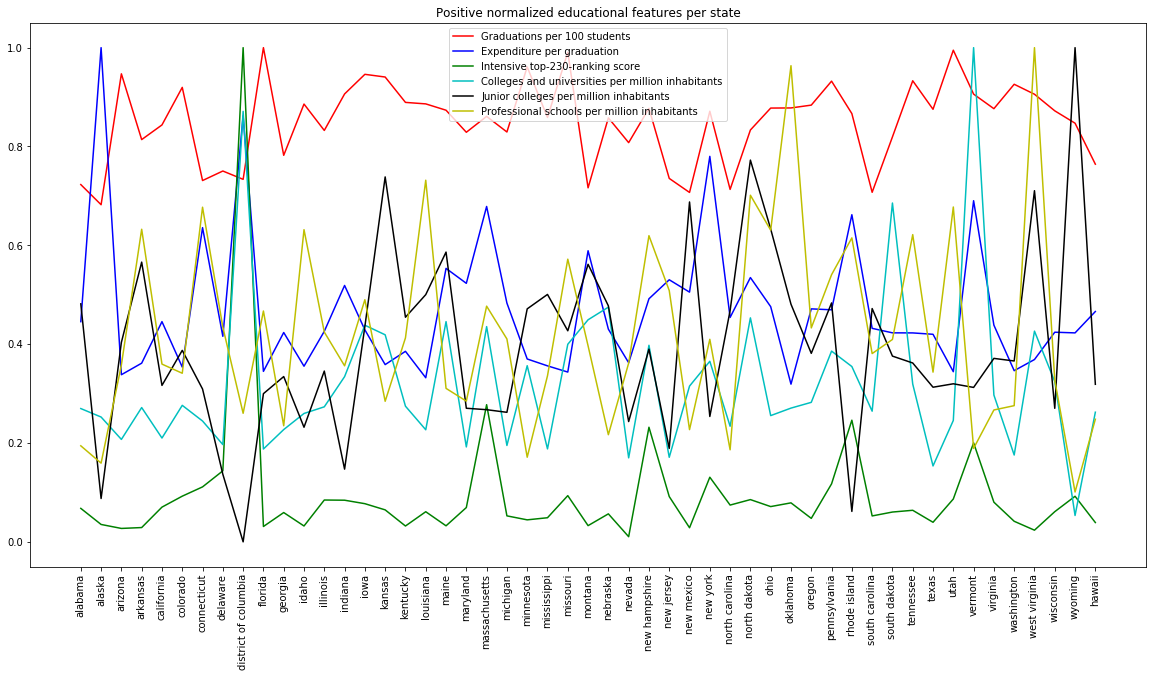

In [62]:
# We plot the positive obtained
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Positive normalized educational features per state")
plt.plot(df_education_final.State, 
         (df_education_final.awards_per_value)/(df_education_final.awards_per_value.max()), 'r') 
plt.plot(df_education_final.State, 
         (df_education_final.exp_award_value)/(df_education_final.exp_award_value.max()), 'b') 
plt.plot(df_education_final.State, 
         (df_education_final.Intensive_top_230_score)/(df_education_final.Intensive_top_230_score.max()), 'g')
plt.plot(df_education_final.State, 
         (df_education_final.Colleges_universities_per_1000000)/(df_education_final.Colleges_universities_per_1000000.max()), 'c')
plt.plot(df_education_final.State, 
         (df_education_final.Junior_colleges_per_1000000)/(df_education_final.Junior_colleges_per_1000000.max()), 'k')
plt.plot(df_education_final.State, 
         (df_education_final.Prof_schools_per_1000000)/(df_education_final.Prof_schools_per_1000000.max()), 'y')
plt.gca().legend(('Graduations per 100 students', 'Expenditure per graduation',
                  'Intensive top-230-ranking score', 'Colleges and universities per million inhabitants',
                  'Junior colleges per million inhabitants', 'Professional schools per million inhabitants'))

We can notice District of Columbia is the absolute champion (except for junior colleges, there is none in D.C.)! But we can see other states have good results in all categories (Massachussets, New York, Vermont, Rhode Island, West Virginia...)!
In spite of this, in general we cannot see a common trend, and in many cases we can notice that the number of junior colleges per million inhabitants seems to be a negative feature!

What about the negative features? We have now 2 negative features:
- *High school average fee*;
- *Elementary school average fee*.

Let's plot these negative features!

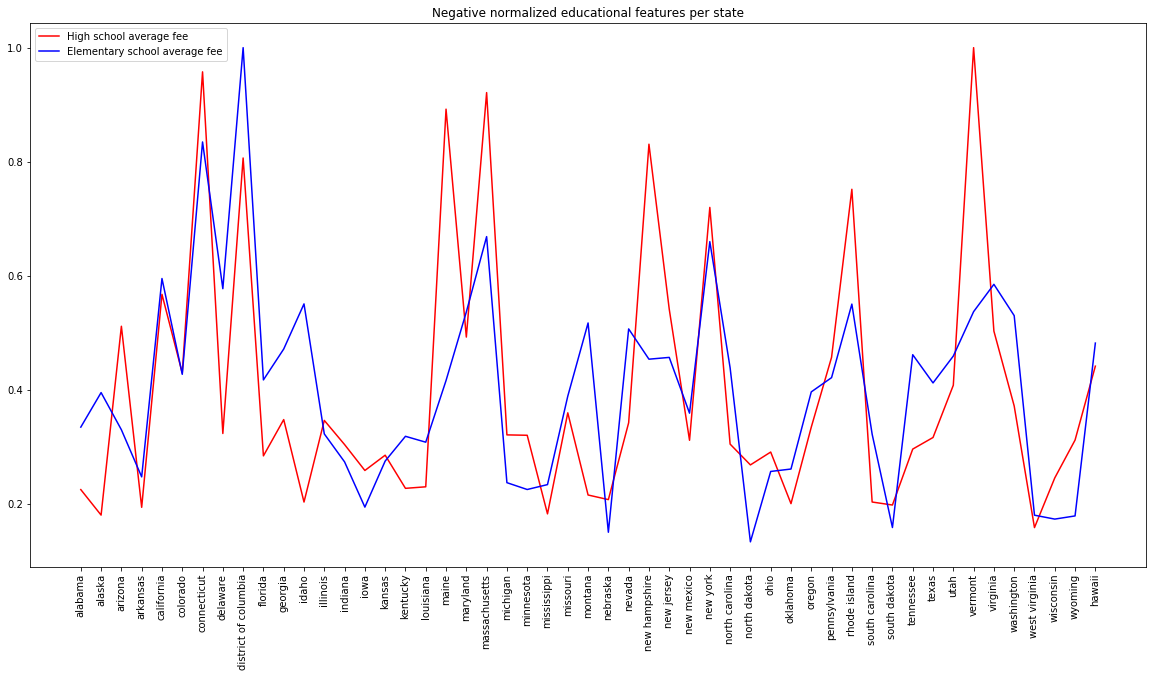

In [63]:
# We plot the negative obtained
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Negative normalized educational features per state") 
plt.plot(df_education_final.State, 
         (df_education_final.High_School_Fee)/(df_education_final.High_School_Fee.max()), 'r')
plt.plot(df_education_final.State, 
         (df_education_final.Elementary_School_Fee)/(df_education_final.Elementary_School_Fee.max()), 'b')
plt.gca().legend(('High school average fee', 'Elementary school average fee'))

In this case we can see a more common trend, but some states that were excellent considering the positive features have also high negative features (for instance, District of Columbia, Massachussets, Vermont).
As said, these two parameters are of course "ambiguous", as we can consider them with a negative and a positive meaning, but we are still convinced a good education is an education with excellent references, but also that is affordable to everyone!
That is why these two features are considered as negative, even if in general they are positively correlated with a good level of education!

In [64]:
df_education_final.corr()

,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score
awards_per_value,1.000000,-0.462936,0.004965,-0.248028,0.043906,0.123325,0.281275,-0.157829
exp_award_value,-0.462936,1.000000,0.519460,0.499588,0.422604,-0.409821,-0.229220,0.516166
High_School_Fee,0.004965,0.519460,1.000000,0.682206,0.387241,-0.333265,-0.063328,0.498121
Elementary_School_Fee,-0.248028,0.499588,0.682206,1.000000,0.166457,-0.585291,-0.084267,0.581427
Colleges_universities_per_1000000,0.043906,0.422604,0.387241,0.166457,1.000000,-0.093338,-0.037426,0.556551
Junior_colleges_per_1000000,0.123325,-0.409821,-0.333265,-0.585291,-0.093338,1.000000,0.079080,-0.379707
Prof_schools_per_1000000,0.281275,-0.229220,-0.063328,-0.084267,-0.037426,0.079080,1.000000,-0.054709
Intensive_top_230_score,-0.157829,0.516166,0.498121,0.581427,0.556551,-0.379707,-0.054709,1.000000


### Things we still need to do
- Implement a ML model on our normalized features to obtain an "education" score
- Once this score is calculated, generate a map showing the education score for each state

#### References

[1] https://en.wikipedia.org/wiki/Human_Development_Index